Step 1: Data Visualization and Preprocessing
Load the Fashion MNIST Dataset
Visualize the Data
Normalize the Image Pixel Values
Convert Labels to One-Hot Encoding
Step 2: Model Architecture and Development
Design a Fully Connected Neural Network
Step 3: Model Training
Compile and Train the Model
Step 4: Performance Evaluation
Evaluate and Visualize Model Performance
Let's go through these steps in detail:

Step 1: Data Visualization and Preprocessing
1.Load the Fashion MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


2.Visualize the Data

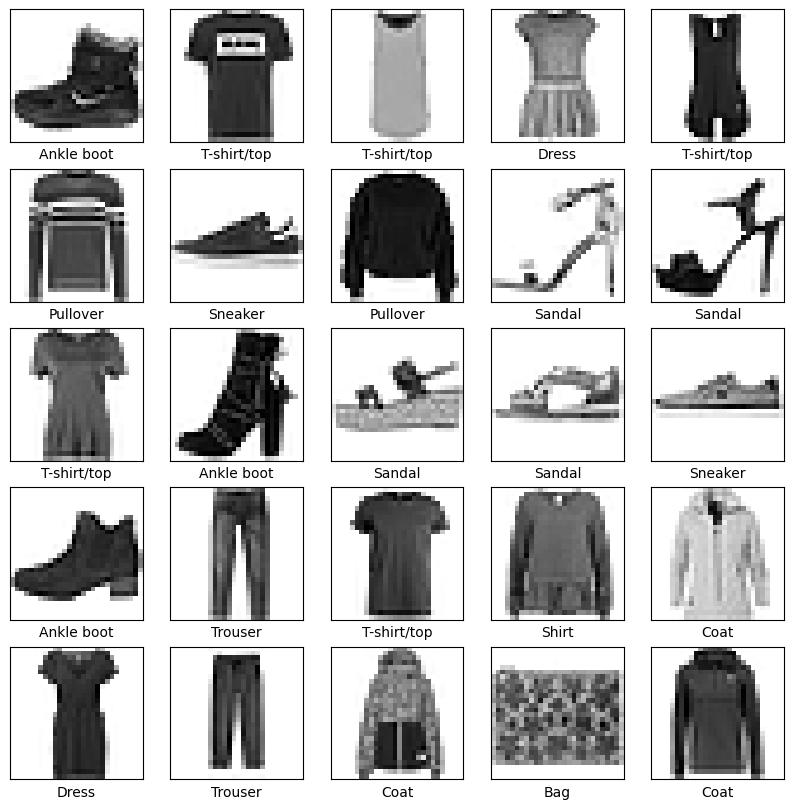

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_sample(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

plot_sample(train_images, train_labels, class_names)


3.Normalize the Image Pixel Values

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0


4.Convert Labels to One-Hot Encoding

In [4]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Step 2: Model Architecture and Development

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Step 3: Model Training

6.Compile and Train the Model

In [6]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 7s 17ms/step - loss: 1.0871 - accuracy: 0.6691 - val_loss: 0.7093 - val_accuracy: 0.7707
Epoch 2/20
375/375 [==============================] - 5s 13ms/step - loss: 0.6272 - accuracy: 0.7952 - val_loss: 0.5949 - val_accuracy: 0.7981
Epoch 3/20
375/375 [==============================] - 5s 13ms/step - loss: 0.5414 - accuracy: 0.8156 - val_loss: 0.5104 - val_accuracy: 0.8263
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.5022 - accuracy: 0.8259 - val_loss: 0.5547 - val_accuracy: 0.7904
Epoch 5/20
375/375 [==============================] - 5s 13ms/step - loss: 0.4750 - accuracy: 0.8347 - val_loss: 0.4824 - val_accuracy: 0.8259
Epoch 6/20
375/375 [==============================] - 7s 17ms/step - loss: 0.4550 - accuracy: 0.8413 - val_loss: 0.4534 - val_accuracy: 0.8422
Epoch 7/20
375/375 [==============================] - 5s 13ms/step - loss: 0.4412 - accuracy: 0.8465 - val_loss: 0.4445 - val_accuracy: 0.8468

Step 4: Performance Evaluation
7.Evaluate and Visualize Model Performance

313/313 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8502
Test accuracy: 0.8501999974250793


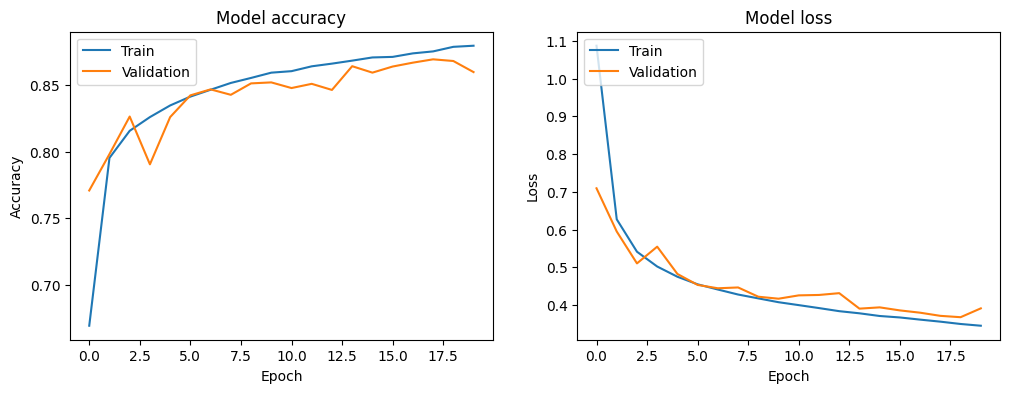

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
